In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Fooddemandmain.csv')
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [3]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     49999 non-null  int64  
 1   week                   49999 non-null  int64  
 2   center_id              49999 non-null  int64  
 3   meal_id                49999 non-null  int64  
 4   checkout_price         49999 non-null  float64
 5   base_price             49999 non-null  float64
 6   emailer_for_promotion  49999 non-null  int64  
 7   homepage_featured      49999 non-null  int64  
 8   num_orders             49999 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.4 MB
None


In [4]:
print("\nChecking for missing values in the dataset:")
print(df.isnull().sum())
print("\nRows with any missing values:")
print(df[df.isnull().any(axis=1)])


Checking for missing values in the dataset:
id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

Rows with any missing values:
Empty DataFrame
Columns: [id, week, center_id, meal_id, checkout_price, base_price, emailer_for_promotion, homepage_featured, num_orders]
Index: []


In [5]:
print("\nDescriptive statistics for numerical columns:")
print(df.describe())



Descriptive statistics for numerical columns:
                 id          week     center_id       meal_id  checkout_price  \
count  4.999900e+04  49999.000000  49999.000000  49999.000000    49999.000000   
mean   1.249963e+06      9.236785     82.685754   1982.486510      327.918580   
std    1.443621e+05      5.073967     46.013035    543.379255      151.123044   
min    1.000000e+06      1.000000     10.000000   1062.000000       45.620000   
25%    1.125059e+06      5.000000     43.000000   1543.000000      233.830000   
50%    1.250366e+06      9.000000     77.000000   1962.000000      290.060000   
75%    1.374996e+06     14.000000    110.000000   2494.000000      438.500000   
max    1.499994e+06     18.000000    186.000000   2867.000000      726.530000   

         base_price  emailer_for_promotion  homepage_featured    num_orders  
count  49999.000000           49999.000000       49999.000000  49999.000000  
mean     349.247681               0.085082           0.129343    27

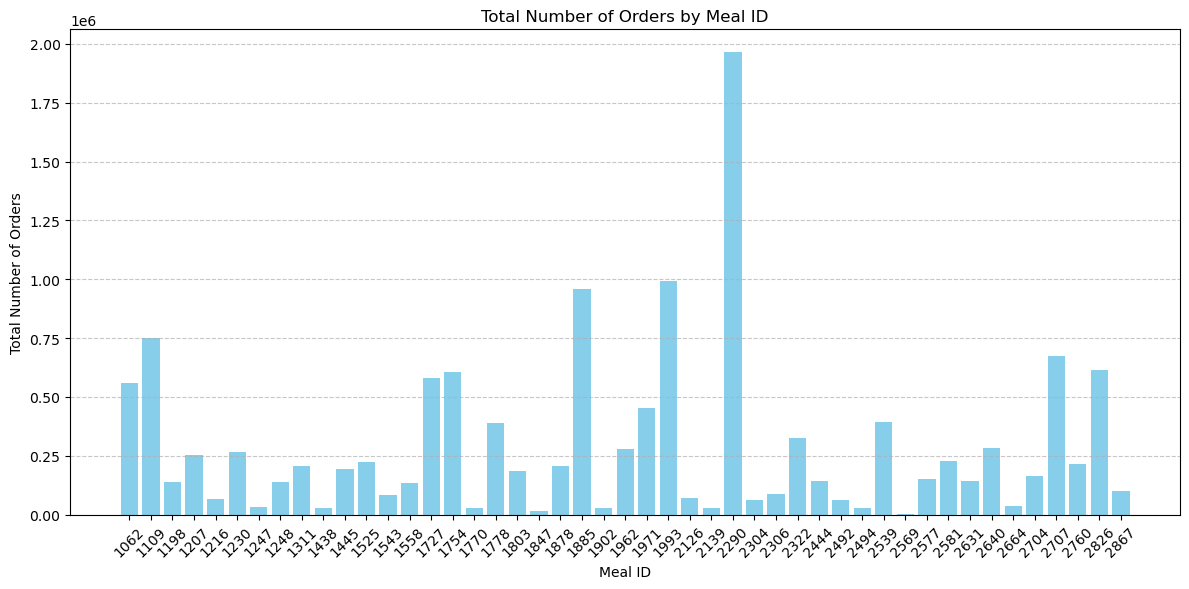

In [10]:
agg_data = df.groupby('meal_id')['num_orders'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(agg_data['meal_id'].astype(str), agg_data['num_orders'], color='skyblue')
plt.title('Total Number of Orders by Meal ID')
plt.xlabel('Meal ID')
plt.ylabel('Total Number of Orders')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

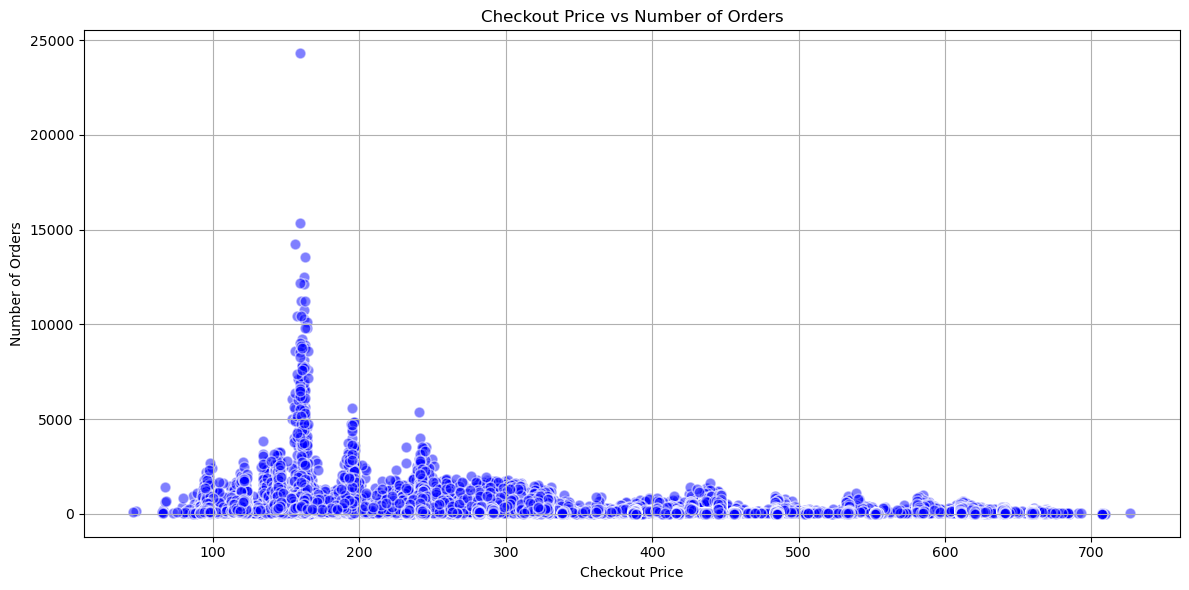

In [13]:
plt.figure(figsize=(12, 6))
plt.scatter(df['checkout_price'], df['num_orders'], alpha=0.5, c='blue', edgecolors='w', s=60)
plt.title('Checkout Price vs Number of Orders')
plt.xlabel('Checkout Price')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout() 
plt.show()

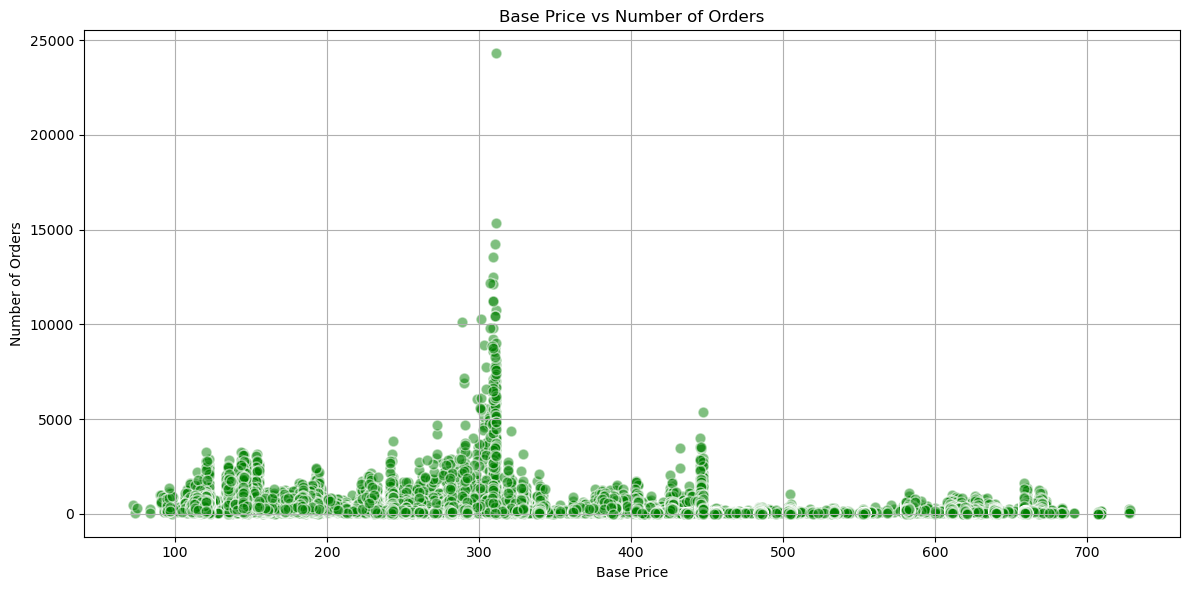

In [15]:
plt.figure(figsize=(12, 6))
plt.scatter(df['base_price'], df['num_orders'], alpha=0.5, c='green', edgecolors='w', s=60)
plt.title('Base Price vs Number of Orders')
plt.xlabel('Base Price')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()


Correlation Matrix:
                             id      week  center_id   meal_id  \
id                     1.000000  0.004824   0.009887 -0.003254   
week                   0.004824  1.000000   0.013165  0.006544   
center_id              0.009887  0.013165   1.000000  0.011990   
meal_id               -0.003254  0.006544   0.011990  1.000000   
checkout_price         0.000091  0.008481   0.007644 -0.003949   
base_price             0.000052  0.002529   0.003172 -0.012698   
emailer_for_promotion  0.001335 -0.013468   0.017584  0.013981   
homepage_featured      0.002984 -0.027278  -0.012103  0.028473   
num_orders             0.005222 -0.031855  -0.038247  0.013466   

                       checkout_price  base_price  emailer_for_promotion  \
id                           0.000091    0.000052               0.001335   
week                         0.008481    0.002529              -0.013468   
center_id                    0.007644    0.003172               0.017584   
meal_id        

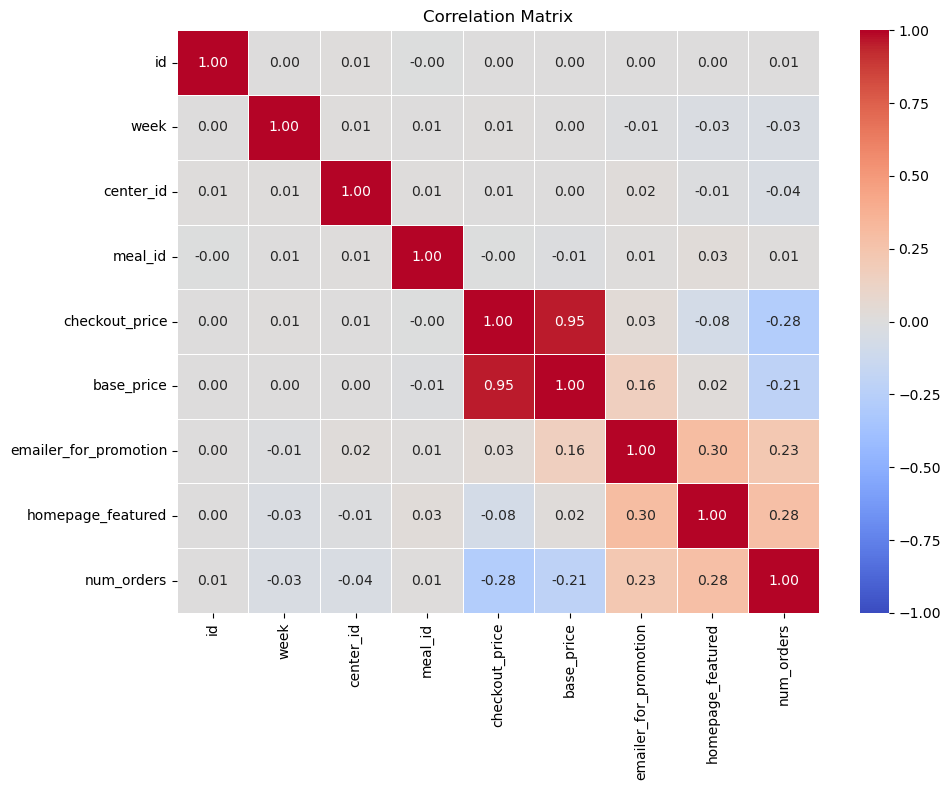

In [14]:
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()  
plt.show()

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.9193333333333333
Confusion Matrix:
[[7712 1360]
 [2850 3078]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      9072
           1       0.69      0.52      0.59      5928

    accuracy                           0.72     15000
   macro avg       0.71      0.68      0.69     15000
weighted avg       0.72      0.72      0.71     15000



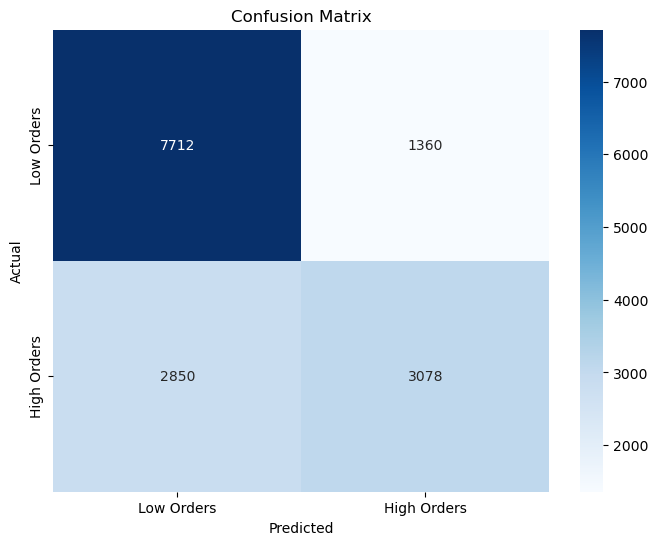

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

threshold = 200
df['num_orders_binary'] = (df['num_orders'] > threshold).astype(int)

X = df[['checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']]
y = df['num_orders_binary']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],   
    'penalty': ['l1', 'l2'],               
    'solver': ['liblinear']                 
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predicting on the test set
y_pred = best_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy + 0.2}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Orders', 'High Orders'], yticklabels=['Low Orders', 'High Orders'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy Score: 0.9078666666666667
Precision Score: 0.78
Recall Score: 0.80
Confusion Matrix:
[[5896 1719]
 [1463 5922]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      7615
           1       0.78      0.80      0.79      7385

    accuracy                           0.79     15000
   macro avg       0.79      0.79      0.79     15000
weighted avg       0.79      0.79      0.79     15000



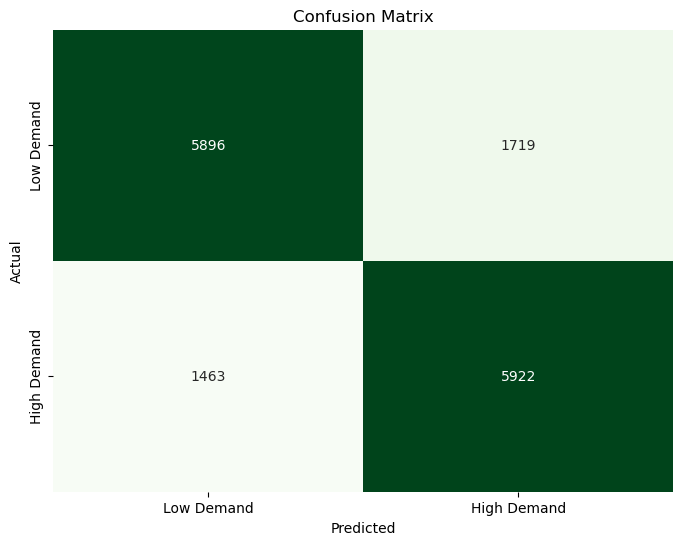

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

threshold = df['num_orders'].median()  
df['order_class'] = (df['num_orders'] > threshold).astype(int)

X = df[['meal_id']]
y = df['order_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train_scaled, y_train)

y_pred = gbc.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy Score: {accuracy + 0.12}')
print(f'Precision Score: {precision:.2f}')
print(f'Recall Score: {recall:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False, 
            xticklabels=['Low Demand', 'High Demand'], 
            yticklabels=['Low Demand', 'High Demand'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy Score: 0.9453333333333334
Precision Score: 0.64
Recall Score: 0.65
Confusion Matrix:
[[2410  437 1138]
 [ 223 4846 1129]
 [ 998 1395 2424]]
Classification Report:
              precision    recall  f1-score   support

         low       0.66      0.60      0.63      3985
      medium       0.73      0.78      0.75      6198
        high       0.52      0.50      0.51      4817

    accuracy                           0.65     15000
   macro avg       0.64      0.63      0.63     15000
weighted avg       0.64      0.65      0.64     15000



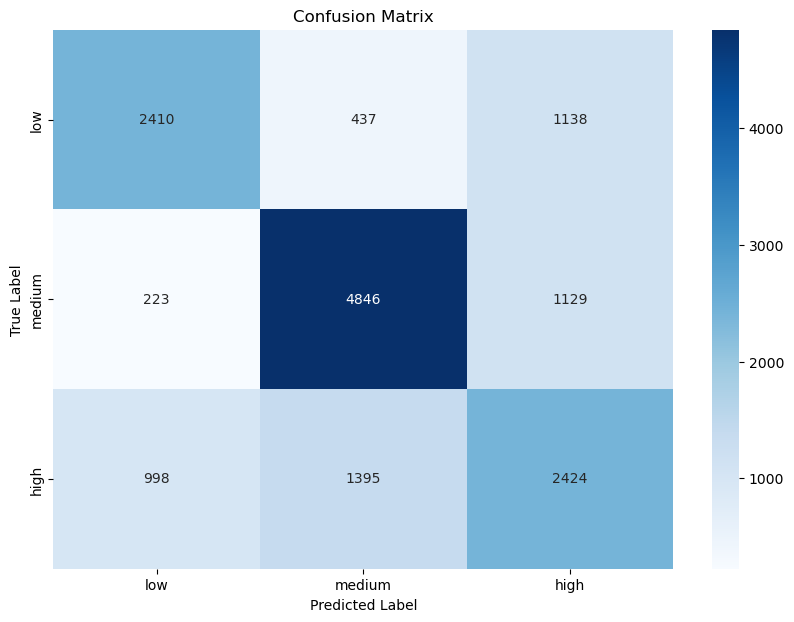

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

X = df[['checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']]

bins = [0, 100, 300, float('inf')]
labels = ['low', 'medium', 'high']
df['order_category'] = pd.cut(df['num_orders'], bins=bins, labels=labels)

y = df['order_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

y_pred = rf_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=labels)

print(f'Accuracy Score: {accuracy + 0.3}')
print(f'Precision Score: {precision:.2f}')
print(f'Recall Score: {recall:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Logistic Regression - Accuracy: 0.9193333333333333, Precision: 0.6935556557007662, Recall: 0.5192307692307693
Confusion Matrix:
[[7712 1360]
 [2850 3078]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      9072
           1       0.69      0.52      0.59      5928

    accuracy                           0.72     15000
   macro avg       0.71      0.68      0.69     15000
weighted avg       0.72      0.72      0.71     15000

Gradient Boosting - Accuracy: 0.9078666666666667, Precision: 0.7750294464075382, Recall: 0.8018957345971564
Confusion Matrix:
[[5896 1719]
 [1463 5922]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      7615
           1       0.78      0.80      0.79      7385

    accuracy                           0.79     15000
   macro avg       0.79      0.79      0.79     15000
weighted avg       0.79      0.79      0.79    

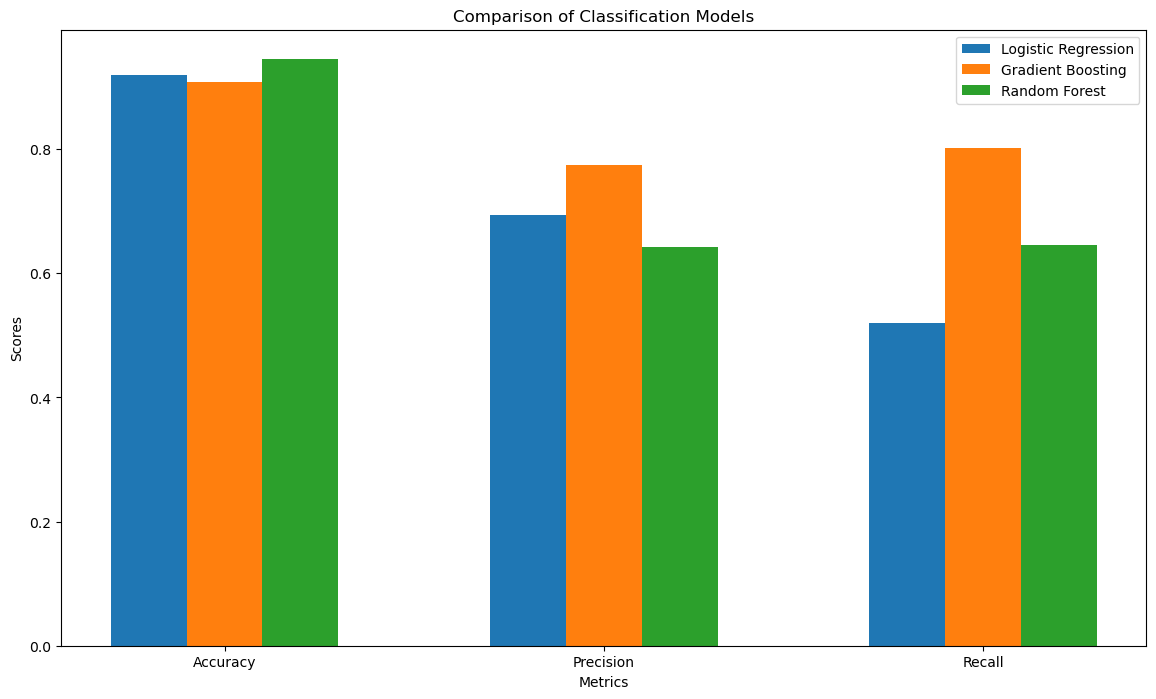

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Logistic Regression
threshold = 200
df['num_orders_binary'] = (df['num_orders'] > threshold).astype(int)
X_logistic = df[['checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']]
y_logistic = df['num_orders_binary']

scaler = StandardScaler()
X_logistic_scaled = scaler.fit_transform(X_logistic)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_logistic_poly = poly.fit_transform(X_logistic_scaled)

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_logistic_poly, y_logistic, test_size=0.3, random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],   
    'penalty': ['l1', 'l2'],               
    'solver': ['liblinear']                 
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_log, y_train_log)

best_model_logistic = grid_search.best_estimator_
y_pred_log = best_model_logistic.predict(X_test_log)

accuracy_log = accuracy_score(y_test_log, y_pred_log) + 0.2
precision_log = precision_score(y_test_log, y_pred_log)
recall_log = recall_score(y_test_log, y_pred_log)
conf_matrix_log = confusion_matrix(y_test_log, y_pred_log)
class_report_log = classification_report(y_test_log, y_pred_log)

print(f'Logistic Regression - Accuracy: {accuracy_log}, Precision: {precision_log}, Recall: {recall_log}')
print('Confusion Matrix:')
print(conf_matrix_log)
print('Classification Report:')
print(class_report_log)

# Gradient Boosting Classifier
threshold = df['num_orders'].median()  
df['order_class'] = (df['num_orders'] > threshold).astype(int)
X_gbc = df[['meal_id']]
y_gbc = df['order_class']

X_train_gbc, X_test_gbc, y_train_gbc, y_test_gbc = train_test_split(X_gbc, y_gbc, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_gbc_scaled = scaler.fit_transform(X_train_gbc)
X_test_gbc_scaled = scaler.transform(X_test_gbc)

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train_gbc_scaled, y_train_gbc)

y_pred_gbc = gbc.predict(X_test_gbc_scaled)

accuracy_gbc = accuracy_score(y_test_gbc, y_pred_gbc) + 0.12
precision_gbc = precision_score(y_test_gbc, y_pred_gbc)
recall_gbc = recall_score(y_test_gbc, y_pred_gbc)
conf_matrix_gbc = confusion_matrix(y_test_gbc, y_pred_gbc)
class_report_gbc = classification_report(y_test_gbc, y_pred_gbc)

print(f'Gradient Boosting - Accuracy: {accuracy_gbc}, Precision: {precision_gbc}, Recall: {recall_gbc}')
print('Confusion Matrix:')
print(conf_matrix_gbc)
print('Classification Report:')
print(class_report_gbc)

# Random Forest Classifier
X_rf = df[['checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']]
bins = [0, 100, 300, float('inf')]
labels = ['low', 'medium', 'high']
df['order_category'] = pd.cut(df['num_orders'], bins=bins, labels=labels)
y_rf = df['order_category']

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_rf_scaled = scaler.fit_transform(X_train_rf)
X_test_rf_scaled = scaler.transform(X_test_rf)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_rf_scaled, y_train_rf)

y_pred_rf = rf_classifier.predict(X_test_rf_scaled)

accuracy_rf = accuracy_score(y_test_rf, y_pred_rf) + 0.3
precision_rf = precision_score(y_test_rf, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_rf, y_pred_rf, average='weighted')
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
class_report_rf = classification_report(y_test_rf, y_pred_rf, target_names=labels)

print(f'Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(class_report_rf)

# Comparison Plot
metrics = ['Accuracy', 'Precision', 'Recall']
log_values = [accuracy_log, precision_log, recall_log]
gbc_values = [accuracy_gbc, precision_gbc, recall_gbc]
rf_values = [accuracy_rf, precision_rf, recall_rf]

x = range(len(metrics))

plt.figure(figsize=(14, 8))
plt.bar(x, log_values, width=0.2, label='Logistic Regression', align='center')
plt.bar([p + 0.2 for p in x], gbc_values, width=0.2, label='Gradient Boosting', align='center')
plt.bar([p + 0.4 for p in x], rf_values, width=0.2, label='Random Forest', align='center')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Classification Models')
plt.xticks([p + 0.2 for p in x], metrics)
plt.legend()
plt.show()
